In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('Hitters.csv')
df.shape

(322, 20)

In [8]:
# drop NAs
d0 = df.dropna()
d0.shape

(263, 20)

In [10]:
# response
y = d0.Salary

# predictors
x = d0.drop(['Salary'], axis = 1)

## axis = 1: column; axis = 0: row

In [11]:
# substitute categorical columns 'League','Division','NewLeague' with dummy variables
x[['League','Division','NewLeague']][:5]

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A


In [15]:
x[['League','Division','NewLeague']] = pd.get_dummies(x[['League','Division','NewLeague']], drop_first = True)
x[['League','Division','NewLeague']][:5]

,League,Division,NewLeague
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1
5,0,1,0


In [19]:
x.dtypes

AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
League       uint8
Division     uint8
PutOuts      int64
Assists      int64
Errors       int64
NewLeague    uint8
dtype: object

In [21]:
x = x.astype('float64')
x.dtypes

AtBat        float64
Hits         float64
HmRun        float64
Runs         float64
RBI          float64
Walks        float64
Years        float64
CAtBat       float64
CHits        float64
CHmRun       float64
CRuns        float64
CRBI         float64
CWalks       float64
League       float64
Division     float64
PutOuts      float64
Assists      float64
Errors       float64
NewLeague    float64
dtype: object

# Ridge Regression

In [22]:
# create an array of 100 alpha values from very small to very large
aux = np.linspace(10,-2,100)
alphas = 10**aux

In [24]:
alphas.min()

0.01

In [25]:
alphas.max()

10000000000.0

In [26]:
# alpha contains 100 values from 10^-2 to 10^10

In [27]:
# fit 100 Ridge regression models, one for each alpha

In [28]:
model = Ridge(normalize = True)

In [31]:
coefs = []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(x, y)
    coefs.append(model.coef_)

In [32]:
df = pd.DataFrame(coefs)
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.208960e-10,4.385439e-10,1.767095e-09,7.416108e-10,7.833741e-10,9.219831e-10,3.770512e-09,1.038009e-11,3.820171e-11,2.880936e-10,7.664116e-11,7.909536e-11,8.368224e-11,-1.288205e-09,-1.733945e-08,4.842285e-11,7.909202e-12,-3.687777e-11,-2.559176e-10
1,1.598174e-10,5.797292e-10,2.335995e-09,9.803659e-10,1.035574e-09,1.218807e-09,4.984395e-09,1.372187e-11,5.050041e-11,3.808428e-10,1.013151e-10,1.045594e-10,1.106230e-10,-1.702931e-09,-2.292173e-08,6.401216e-11,1.045550e-11,-4.875024e-11,-3.383080e-10
2,2.112692e-10,7.663679e-10,3.088048e-09,1.295986e-09,1.368969e-09,1.611192e-09,6.589076e-09,1.813951e-11,6.675858e-11,5.034518e-10,1.339326e-10,1.382214e-10,1.462371e-10,-2.251174e-09,-3.030118e-08,8.462031e-11,1.382156e-11,-6.444495e-11,-4.472232e-10
3,2.792855e-10,1.013093e-09,4.082218e-09,1.713217e-09,1.809696e-09,2.129901e-09,8.710371e-09,2.397936e-11,8.825091e-11,6.655336e-10,1.770510e-10,1.827205e-10,1.933168e-10,-2.975920e-09,-4.005638e-08,1.118631e-10,1.827128e-11,-8.519243e-11,-5.912028e-10
4,3.691990e-10,1.339250e-09,5.396451e-09,2.264772e-09,2.392311e-09,2.815603e-09,1.151460e-08,3.169931e-11,1.166625e-10,8.797963e-10,2.340510e-10,2.415458e-10,2.555535e-10,-3.933991e-09,-5.295217e-08,1.478764e-10,2.415356e-11,-1.126194e-10,-7.815353e-10


In [36]:
# add column name
df.columns = x.columns

In [37]:
# round to 3 digits after the decimal point
df.round(3)[-5:]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
95,-1.031,3.747,-0.920,0.695,0.535,4.064,-10.579,-0.014,0.160,0.720,0.403,0.301,-0.403,57.629,-124.203,0.272,0.215,-3.842,-23.693
96,-1.187,4.220,-0.596,0.488,0.430,4.371,-10.891,-0.022,0.170,0.725,0.463,0.318,-0.457,58.938,-124.215,0.274,0.235,-3.855,-25.357
97,-1.335,4.689,-0.216,0.250,0.313,4.662,-10.943,-0.031,0.179,0.722,0.531,0.336,-0.507,59.905,-123.955,0.276,0.253,-3.842,-26.519
98,-1.468,5.136,0.199,-0.010,0.190,4.928,-10.754,-0.042,0.186,0.707,0.606,0.357,-0.553,60.611,-123.493,0.278,0.270,-3.810,-27.252
99,-1.584,5.546,0.632,-0.280,0.064,5.165,-10.360,-0.053,0.192,0.678,0.685,0.381,-0.595,61.128,-122.894,0.279,0.286,-3.767,-27.641


In [38]:
# plot coefficients vs alphas
# shows the change of coefs when changing alpha

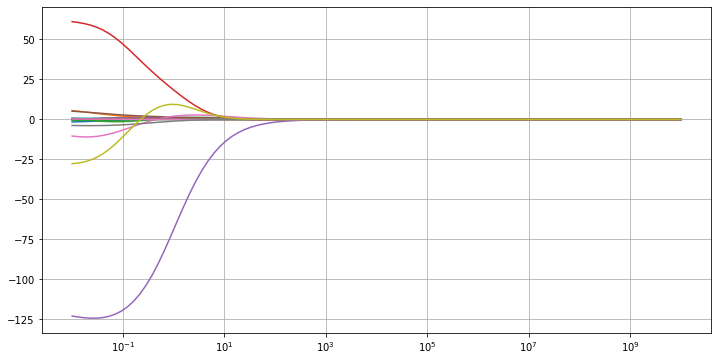

In [42]:
plt.figure(figsize = (12,6))
ax = plt.gca()          # get current axis
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.grid()

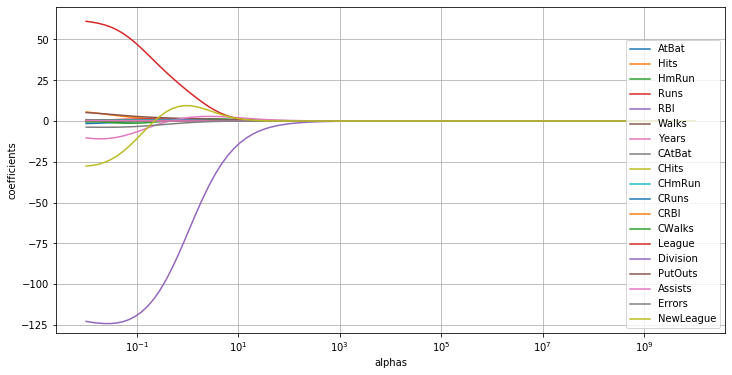

In [45]:
plt.figure(figsize = (12,6))
ax = plt.gca()          # get current axis

for i in range(19):
    aux = np.array(coefs)[:,i]
    ax.plot(alphas,aux,label = x.columns.values[i])
    ax.set_xscale('log')
    
plt.legend(loc = 4)
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.ylim(-130,70)
plt.grid()

In [46]:
# coefficients shrink to zero as alpha increases

# Validation Approach with Fixed Alpha

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 1)

In [49]:
# fit model with alpha = 4
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [50]:
# model coefs
pd.DataFrame(ridge2.coef_,index = x.columns)

,0
AtBat,0.098658
Hits,0.446094
HmRun,1.412107
Runs,0.660773
RBI,0.843403
Walks,1.008473
Years,2.779882
CAtBat,0.008244
CHits,0.034149
CHmRun,0.268634


In [52]:
# MSE of test set (for alpha = 4)
# compare predictions vs test y
pred2 = ridge2.predict(X_test)
mean_squared_error(y_test,pred2)

106216.52238005563

In [53]:
df = pd.DataFrame()
df['Salary'] = y_test
df['Predicted'] = pred2
df[:5]

,Salary,Predicted
126,500.0,463.369745
13,700.0,349.309231
207,700.0,651.747055
221,210.0,533.997460
68,105.0,509.718624


In [54]:
# fit model with huge alpha = 10^9
ridge3 = Ridge(alpha = 10**9, normalize = True)
ridge3.fit(X_train, y_train)

Ridge(alpha=1000000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [55]:
print(pd.Series(ridge3.coef_, index = x.columns))

AtBat        1.317464e-09
Hits         4.647486e-09
HmRun        2.079865e-08
Runs         7.726175e-09
RBI          9.390640e-09
Walks        9.769219e-09
Years        3.961442e-08
CAtBat       1.060533e-10
CHits        3.993605e-10
CHmRun       2.959428e-09
CRuns        8.245247e-10
CRBI         7.795450e-10
CWalks       9.894387e-10
League      -2.501281e-08
Division    -1.549951e-07
PutOuts      7.268991e-10
Assists     -2.615885e-11
Errors       2.084514e-09
NewLeague   -2.023196e-08
dtype: float64


In [56]:
# all coefs very close to zero

In [57]:
# MSE for test set (for alpha = 10^9)
pred3 = ridge3.predict(X_test)
mean_squared_error(y_test, pred3)

172862.234750706

In [58]:
# over shrinking results in a higher test MSE

# Compare Ridge Regression with Linear Regression

In [59]:
ridge0 = Ridge(alpha = 0, normalize = True)
ridge0.fit(X_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [60]:
print(pd.Series(ridge0.coef_, index = x.columns))

AtBat         -1.821115
Hits           4.259156
HmRun         -4.773401
Runs          -0.038760
RBI            3.984578
Walks          3.470126
Years          9.498236
CAtBat        -0.605129
CHits          2.174979
CHmRun         2.979306
CRuns          0.266356
CRBI          -0.598456
CWalks         0.171383
League       133.743163
Division    -113.743875
PutOuts        0.421063
Assists        0.464379
Errors        -6.024576
NewLeague    -81.927763
dtype: float64


In [62]:
# MSE of linear regression
pred = ridge0.predict(X_test)
mean_squared_error(y_test, pred)

116690.46856660438

In [63]:
# test MSE with alpha = 0 is larger than test MSE with alpha = 4

# Ridge Regression Cross-Validation Seeking the Best Alpha

In [68]:
# the first 'alpha' is the parameter, the second one is the list of alphas we created ealier
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [69]:
# best alpha
ridgecv.alpha_

0.49770235643321137

In [71]:
# best alpha test MSE
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

99997.35172902551

In [72]:
# better than alpha = 4

In [73]:
# coefficients for new prediction - use full dataset

In [74]:
ridge4.fit(x, y)

Ridge(alpha=0.49770235643321137, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [75]:
pd.Series(ridge4.coef_, index = x.columns)

AtBat         0.039089
Hits          0.987271
HmRun         0.210328
Runs          1.108092
RBI           0.875440
Walks         1.778644
Years         0.351680
CAtBat        0.011224
CHits         0.063656
CHmRun        0.443470
CRuns         0.126382
CRBI          0.135001
CWalks        0.033335
League       26.494555
Division    -90.056030
PutOuts       0.188256
Assists       0.040423
Errors       -1.751570
NewLeague     7.580892
dtype: float64

# Lasso Regression

In [77]:
# lasso may not converge (fail!) unless a large number of iterations are carried out

In [78]:
lasso_model = Lasso(max_iter = 10000, normalize = True)

In [79]:
# scale the data
from sklearn.preprocessing import scale

In [81]:
coefs = []
for a in alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(scale(X_train),y_train)
    coefs.append(lasso_model.coef_)

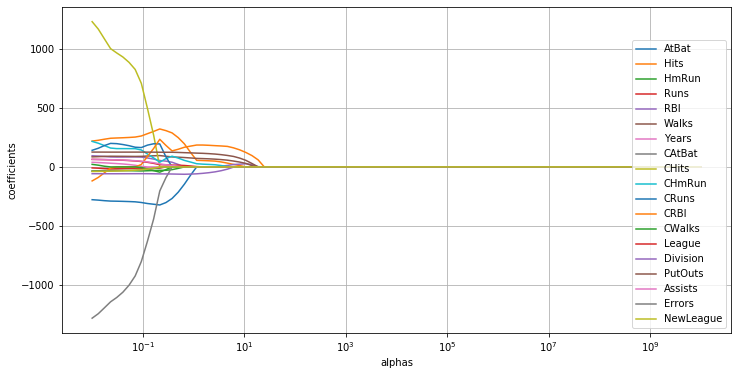

In [87]:
plt.figure(figsize = (12,6))
ax = plt.gca()

for i in range(19):
    aux = np.array(coefs)[:,i]
    ax.plot(alphas,aux,label = x.columns.values[i])
    ax.set_xscale('log')
    
plt.legend(loc = 4)
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.grid()

# Lasso Cross-Validations Seeking the Best Alpha

In [88]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [89]:
# best alpha
lassocv.alpha_

2.656087782946684

In [90]:
# best alpha test MSE

In [91]:
lasso_model.set_params(alpha = lassocv.alpha_)

Lasso(alpha=2.656087782946684, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
lasso_model.fit(X_train, y_train)
mean_squared_error(y_test, lasso_model.predict(X_test))

105162.1584888249

In [95]:
# not as good

In [96]:
pd.Series(lasso_model.coef_, index = x.columns)

AtBat         0.000000
Hits          1.060003
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         2.859441
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.206718
CRuns         0.000000
CRBI          0.510666
CWalks        0.000000
League        0.000000
Division    -83.473926
PutOuts       0.363681
Assists      -0.000000
Errors       -0.000000
NewLeague     0.000000
dtype: float64

In [97]:
# dimentional reduction
# 13 regression coefficients equal to zero using the best alpha found by cv

In [99]:
# coefs for new prediction - using full dataset
lasso_model.fit(x,y)
pd.Series(lasso_model.coef_, index = x.columns)

AtBat         0.000000
Hits          1.645595
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         1.903195
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.000000
CRuns         0.181064
CRBI          0.377327
CWalks        0.000000
League        0.000000
Division    -55.866160
PutOuts       0.152331
Assists       0.000000
Errors       -0.000000
NewLeague     0.000000
dtype: float64